# Table of Contents
O. [Python Imports](#O.-Python-Imports)  
I. [Data Visualization](#II.-Data visualization)  
II. [Loading and Preprocessing data](#I.-Loading-and-Preprocessing-data)  
III. [Running Experiments](#III.-Running-Experiments)  
* [Training subset size](#Experiment-1:-Training-subset-size)  
* [Learning rates](#Experiment-2:-Learning-rates) 

IV. [Plotting experiment data](#IV.-Plotting-experiment-data)  
* [Processing raw data](#1.-Processing-raw-data)  
* [Plot learning rate experiment data](#2.-Plot-learning-rate-experiment-data)  
* [Plot subset size experiment data](#3.-Plot-subset-size-experiment-data)  
* [Generate then plot confusion matrix](#4.-Generate-then-plot-confusion-matrix)  

# O. Python Imports

In [1]:
%matplotlib inline

import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import pickle

from nnrunner import Network

# I. Loading and Preprocessing data

In [2]:
init_start = time.time()

train = pd.read_csv('mnist_train.csv', header=None)
train_load = time.time()
print("Loaded mnist training data in %.4ss" % (train_load - init_start))

test = pd.read_csv('mnist_test.csv', header=None)
test_load = time.time()
print("Loaded mnist test data in %.4ss" % (test_load - train_load))

training_data = [(train.iloc[i][1:].values/255.0, train.iloc[i][0]) for i in range(len(train))]
train_proc = time.time()
print("Processed training data in %.4ss" % (train_proc - test_load))

test_proc = time.time()
test_data = [(test.iloc[i][1:].values/255.0, test.iloc[i][0]) for i in range(len(test))]
print("Processed test data in %.4ss" % (test_proc - train_proc))

print("Finished loading and processing mnist data.")


Loaded mnist training data in 5.24s
Loaded mnist test data in 0.89s
Processed training data in 14.9s
Processed test data in 0.00s
Finished loading and processing mnist data.


# II. Data visualization

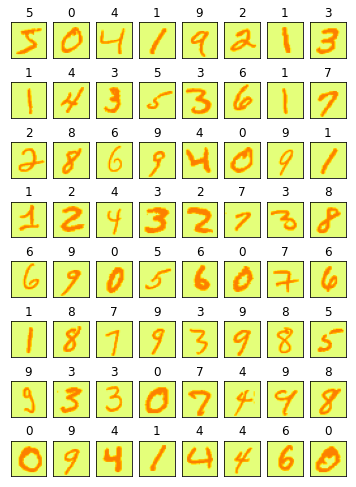

In [3]:
grid_size = 8
fig, ax = plt.subplots(grid_size, grid_size)
plt.subplots_adjust(top=1.75)
for i in range(grid_size**2):
    cur_ax = ax[i//grid_size][i%grid_size]
    img = np.array(train.iloc[i][1:])
    img = np.reshape(img, (28,28))
    
    cur_ax.set_yticklabels([])
    cur_ax.set_xticklabels([])
    cur_ax.set_yticks([])
    cur_ax.set_xticks([])
    
    cur_ax.set_title(train.iloc[i][0])
    cur_ax.imshow(img, cmap='Wistia', interpolation='hanning')

# III. Running Experiments

### Experiment 1: Training subset size

In [10]:
# Initialization
subset_size_results = []
#msizes = [0.001, 0.01, 0.1]
msizes = [0.0002, 0.0004, 0.0016]

In [5]:
subset_start = time.time()
for msize in msizes:
    net = Network(msize=msize)
    subset_size_results.append(net.Train(training_data, test_data)) # accuracy for each learning rate after each epoch
    
print(f"Completed subset size experiment in {(time.time() - subset_start)/60.0:.2f} minutes")

Training results written to file.
Training results written to file.
Training results written to file.
Completed subset size experiment in 24.66 minutes


### Saving experiment results

In [33]:
badchars = [" ", ":"]
fname = f"subset_size_exp_results_{str(datetime.now()).translate({ord(x): '_' for x in badchars})}_{'_'.join(map(str, msizes))}.data"
with open('results/'+fname, "wb") as f:
    pickle.dump(subset_size_results, f)
    
print("Subset size experiment results written to file.")

Subset size experiment results written to file.


### Experiment 2: Learning rates

In [9]:
# Initialization
learning_rate_results = []
learning_rates = [0.001, 0.01, 0.1]

In [6]:
eta_start = time.time()
for eta in learning_rates:
    net = Network(eta=eta)
    learning_rate_results.append(net.Train(training_data, test_data)) # accuracy for each learning rate after each epoch
    
print(f"Completed learning rate experiment in {(time.time() - eta_start)/60.0:.2f} minutes")

Training results written to file.
Training results written to file.
Training results written to file.
Completed learning rate experiment in 22.69 minutes


In [7]:
badchars = [" ", ":"]
fname = f"learning_rate_exp_results_{str(datetime.now()).translate({ord(x): '_' for x in badchars})}_{'_'.join(map(str, learning_rates))}.data"
with open("results/" + fname, "wb") as f:
    pickle.dump(learning_rate_results, f)
    
print("Learning rate experiment results written to file.")

Learning rate experiment results written to file.


### (opt) Load learning rate experiment data from file

In [4]:
fname = "learning_rate_exp_results_2020-01-21_18_26_34.879405_0.001_0.01_0.1.data"
with open("results/" + fname, "rb") as f:
    learning_rate_results = pickle.load(f)

### (opt) Load subset size experiment data from file

In [5]:
fname = "subset_size_exp_results_2020-01-21_18_54_43.033246_0.001_0.01_0.1.data"
with open("results/" + fname, "rb") as f:
    subset_size_results = pickle.load(f)

# IV. Plotting experiment data

### 1. Processing raw data

In [6]:
eta_exp_training = []
eta_exp_test = []
for result in learning_rate_results:
    eta_exp_training.append([100*x for x, y in result])
    eta_exp_test.append([100*y for x, y in result])

sub_exp_training = []
sub_exp_test = []
for result in subset_size_results:
    sub_exp_training.append([100*x for x, y in result])
    sub_exp_test.append([100*y for x, y in result])


### 2. Plot learning rate experiment data

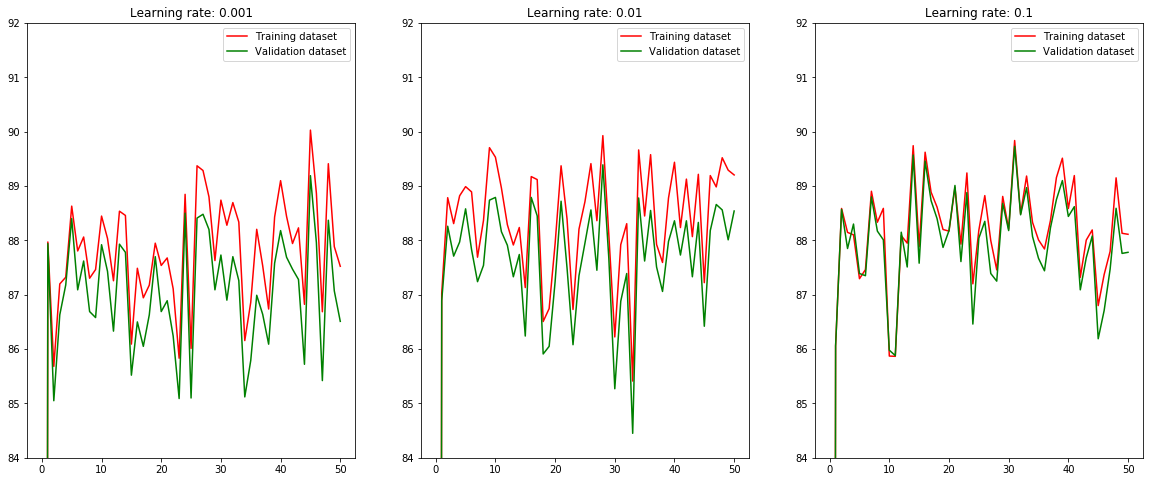

In [11]:
fig, axes = plt.subplots(1,3, figsize=(20, 8))
xaxi = list(range(51)) # 1 + number of epochs
for i, ax in enumerate(axes):
    ax.set(title=f"Learning rate: {learning_rates[i]}", ylim=[84, 92])
    train_line, = ax.plot(xaxi, eta_exp_training[i], 'r-')
    train_line.set_label("Training dataset")
    test_line, = ax.plot(xaxi, eta_exp_test[i], 'g-')
    test_line.set_label("Validation dataset")
    ax.legend()

### 3. Plot subset size experiment data

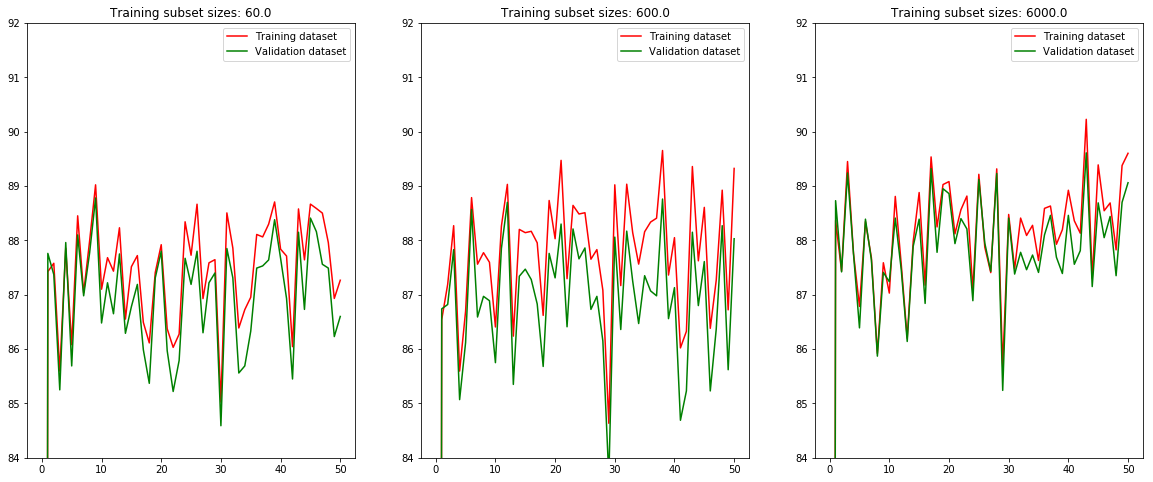

In [12]:
fig, axes = plt.subplots(1,3, figsize=(20, 8))
xaxi = list(range(51)) # 1 + number of epochs
M = 60000
for i, ax in enumerate(axes):
    ax.set(title=f"Training subset sizes: {M*msizes[i]}", ylim=[84, 92])
    train_line, = ax.plot(xaxi, sub_exp_training[i], 'r-')
    train_line.set_label("Training dataset")
    test_line, = ax.plot(xaxi, sub_exp_test[i], 'g-')
    test_line.set_label("Validation dataset")
    ax.legend()

### 4. Generate then plot confusion matrix

In [47]:
train_run = time.time()
net = Network(eta=0.1, msize=0.1) # appears to give best results
net.Train(training_data, test_data, fast=True);
print(f"Trained data in {(time.time() - train_run)/60.0:.2f} minutes")

Trained data in 3.45 minutes


In [48]:
acc, conf_matrix = net.Test(test_data, build_matrix=True)
matrix = []
for i in range(10):
    matrix.append([conf_matrix[(i, j)] for j in range(10)])

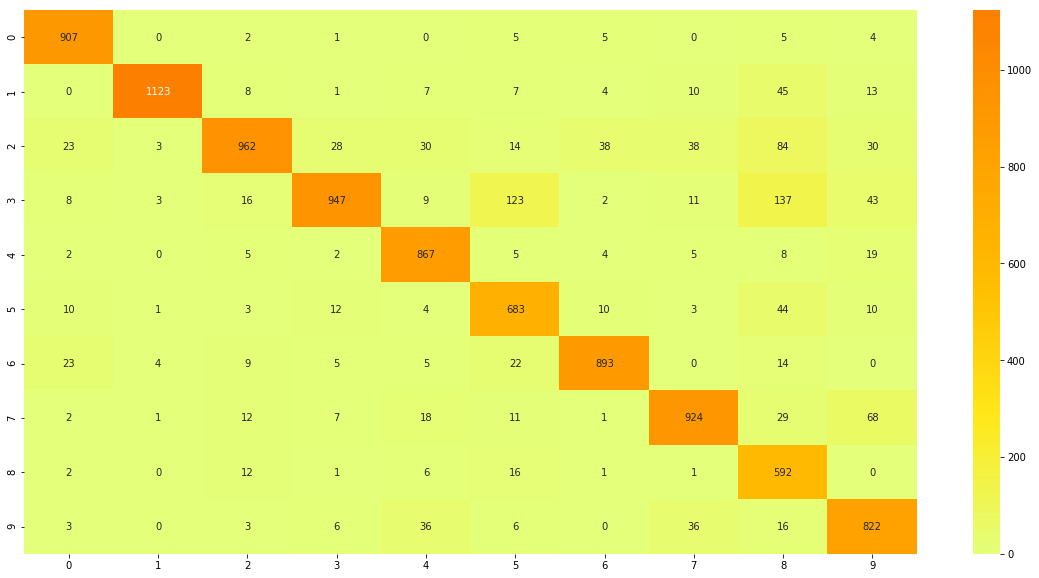

In [49]:
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True, cmap='Wistia', fmt='g')